# **This dataset can be useful for data analysis, machine learning models, and business insights related to used car pricing, depreciation trends, and market demand.**

#Potential applications include:
✔️ Price Prediction Models

✔️ Resale Value Analysis

✔️ Identifying Key Factors Affecting Car Prices

✔️ Customer Preference Insights

# **IMPORT DATASET**

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

print("Path to dataset files:", path)

100%|██████████| 22.1k/22.1k [00:00<00:00, 22.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amanrajput16/used-car-price-data-from-cars24/versions/1


# **IMPORT LIBS**

In [40]:
import pandas as pd
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing

from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [5]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/amanrajput16/used-car-price-data-from-cars24/versions/1/cars24data.csv')
df.head(10)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
5,2014 Maruti Alto 800 LXI,233000,2014,796,No,Manual,43780,1,Petrol,10,2
6,2020 Maruti Swift VXI,593000,2020,1197,Yes,Manual,49583,1,Petrol,1,0
7,2018 Maruti Dzire VXI AMT,583000,2018,1197,No,Automatic,86837,2,Petrol,4,6
8,2016 Maruti Swift Dzire VXI,513000,2016,1197,Yes,Manual,58570,2,Petrol,10,3
9,2019 Maruti S PRESSO VXI,378000,2019,998,Yes,Manual,50645,1,Petrol,0,0


In [6]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [9]:
df['Engine capacity'].value_counts()

,count
Engine capacity,
1197,589
998,472
1462,130
796,94
1373,80
1248,74
1196,6


In [10]:
numerical_features = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_features].corr()

In [11]:
corr_matrix['Engine capacity'].sort_values(ascending=False)

,Engine capacity
Engine capacity,1.000000
Price,0.718906
Manufacturing_year,0.128797
KM driven,0.017436
Repainted Parts,-0.015830
Imperfections,-0.034947
Ownership,-0.075150


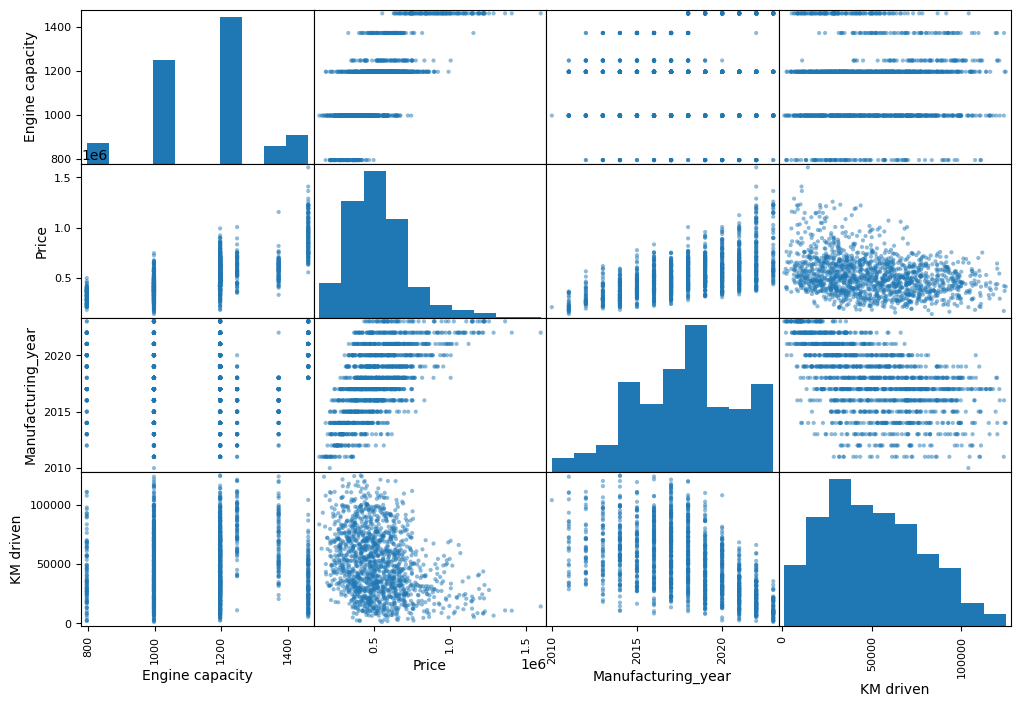

In [12]:
attributes = ['Engine capacity', 'Price', 'Manufacturing_year', 'KM driven']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

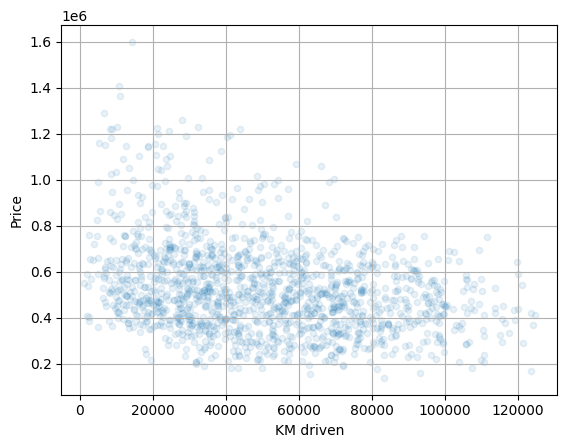

In [13]:
df.plot(kind="scatter", x="KM driven", y="Price",
alpha=0.1, grid=True)
plt.show()

In [14]:
df.isna().sum().sort_values(ascending=False)

,0
Model Name,0
Price,0
Manufacturing_year,0
Engine capacity,0
Spare key,0
Transmission,0
KM driven,0
Ownership,0
Fuel type,0
Imperfections,0


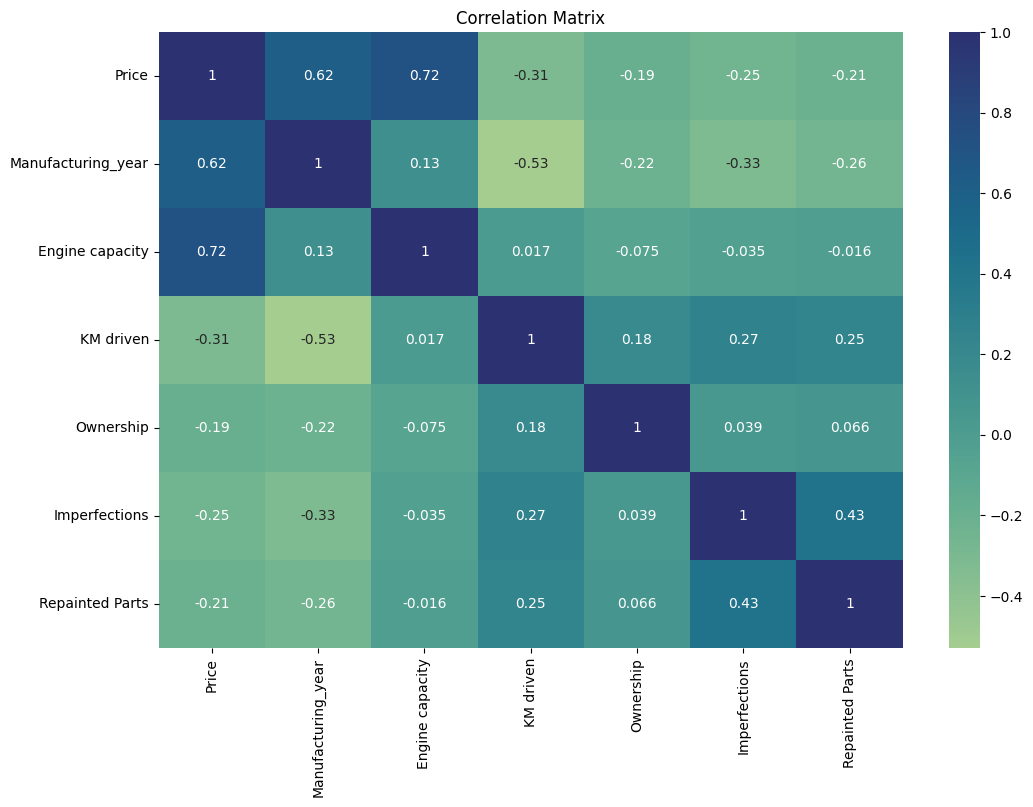

In [29]:
correlation_matrix = df.corr(numeric_only = True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'crest')
sns.color_palette("mako", as_cmap=True)
plt.title('Correlation Matrix')
plt.show()

## **Strong Positive Correlations:**

**Price vs Engine capacity → 0.72**

The larger the engine capacity, the higher the car's price tends to be.

**Price vs Manufacturing_year → 0.62**

Newer cars tend to have higher prices.

## **Moderate Negative Correlations:**

**Price vs KM driven → -0.31**

More driven cars tend to be worth less.

**Manufacturing_year vs KM driven → -0.53**

Older cars generally have more kilometers driven.

**Manufacturing_year vs Imperfections → -0.33**

Older cars tend to have more imperfections.

In [30]:
X = df[['KM driven', 'Manufacturing_year', 'Engine capacity']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'Decision Tree': DecisionTreeRegressor()
}

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")

Linear Regression - Mean Squared Error: 7547977558.61322, R-squared: 0.7734467416448156
Random Forest - Mean Squared Error: 7761201965.397923, R-squared: 0.767046790963616
Gradient Boosting - Mean Squared Error: 6174109571.742172, R-squared: 0.814683518855465
Support Vector Regression - Mean Squared Error: 33547900447.034466, R-squared: -0.006943396192000684
Decision Tree - Mean Squared Error: 9978910034.602076, R-squared: 0.7004820740898293


# **PREDICTS**

In [57]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
#---------------------------------#
# The model that performed best was
# GradientBoostingRegressor. we will
# use it for the data.

GradientBoostingRegressor()

In [47]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6174109571.742171
R-squared: 0.814683518855465


In [48]:
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
print(comparison_df)

      Actual Price  Predicted Price
413         331000    379274.458672
316         708000    603991.605502
1034        746000    637815.688600
65          429000    411605.407766
1024        329000    345662.219649
...            ...              ...
1107        530000    511857.444383
86          755000    823837.613493
1372        320000    339345.361335
265         237000    248695.040846
1222        442000    386041.669679

[289 rows x 2 columns]


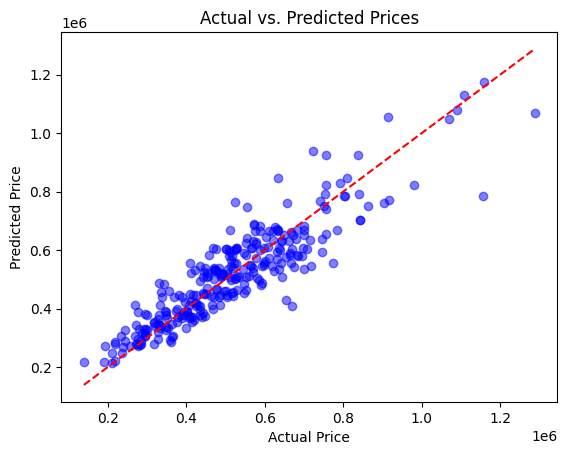

In [56]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, )
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()